In [1]:
#importing all the required libraries
import numpy as np 
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pip install tqdm
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px
#%pip install google.colab
 #from google.colab import files
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('ElectricCarData_Clean.csv')

df.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7000,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8000,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5000,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


# READING THE DATA

In [3]:
#df['FastCharge_KmH'].astype(str).astype(int)
#df["Brand"] = df["Brand"].astype(int)
#df['FastCharge_KmH'] = df['FastCharge_KmH'].fillna(0).astype(int)
#FastCharge_KmH=int('data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [4]:
df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
#df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7000,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5000,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [5]:
df[(df['Brand'] == 'Tesla ') | (df['Brand'] == 'BMW ')]



,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
8,Tesla,Model 3 Standard Range Plus,5.6000,225,310,153,650,1,RWD,Type 2 CCS,Sedan,D,5,46380,3858.8160
13,BMW,i4,4.0000,200,450,178,650,1,RWD,Type 2 CCS,Sedan,D,5,65000,5408.0000
21,Tesla,Model Y Long Range Dual Motor,5.1000,217,425,171,930,1,AWD,Type 2 CCS,SUV,D,7,58620,4877.1840
24,Tesla,Model 3 Long Range Performance,3.4000,261,435,167,910,1,AWD,Type 2 CCS,Sedan,D,5,61480,5115.1360
28,BMW,i3 120 Ah,7.3000,150,235,161,270,1,RWD,Type 2 CCS,Hatchback,B,4,38017,3163.0144
33,Tesla,Cybertruck Tri Motor,3.0000,210,750,267,710,1,AWD,Type 2 CCS,Pickup,N,6,75000,6240.0000
40,Tesla,Model S Long Range,3.8000,250,515,184,560,1,AWD,Type 2,Liftback,F,5,79990,6655.1680
51,Tesla,Roadster,2.1000,410,970,206,920,1,AWD,Type 2 CCS,Cabrio,S,4,215000,17888.0000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


# FINDING OUT NULL VALUES

In [7]:
df.isnull().sum()


Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

In [8]:
df.describe()


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
count,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000
mean,7.3961,179.1942,338.7864,189.1650,457.5728,0.9515,4.8835,55811.5631,4643.5221
std,3.0174,43.5730,126.0144,29.5668,197.0641,0.2160,0.7958,34134.6653,2840.0042
min,2.1000,123.0000,95.0000,104.0000,170.0000,0.0000,2.0000,20129.0000,1674.7328
25%,5.1000,150.0000,250.0000,168.0000,305.0000,1.0000,5.0000,34429.5000,2864.5344
50%,7.3000,160.0000,340.0000,180.0000,440.0000,1.0000,5.0000,45000.0000,3744.0000
75%,9.0000,200.0000,400.0000,203.0000,555.0000,1.0000,5.0000,65000.0000,5408.0000
max,22.4000,410.0000,970.0000,273.0000,940.0000,1.0000,7.0000,215000.0000,17888.0000


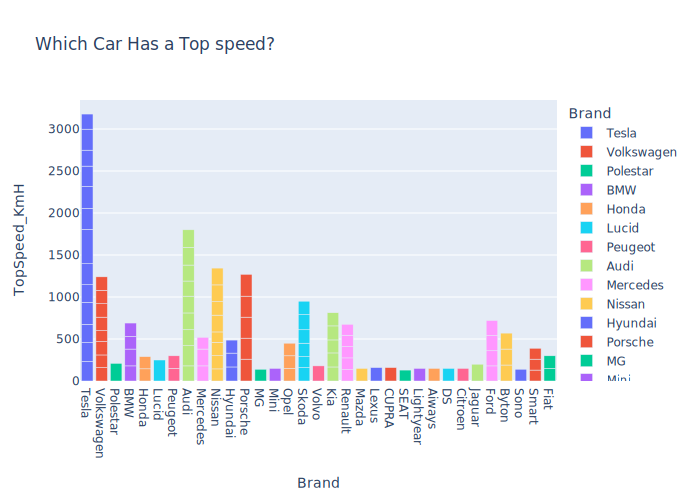

In [9]:
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)
     


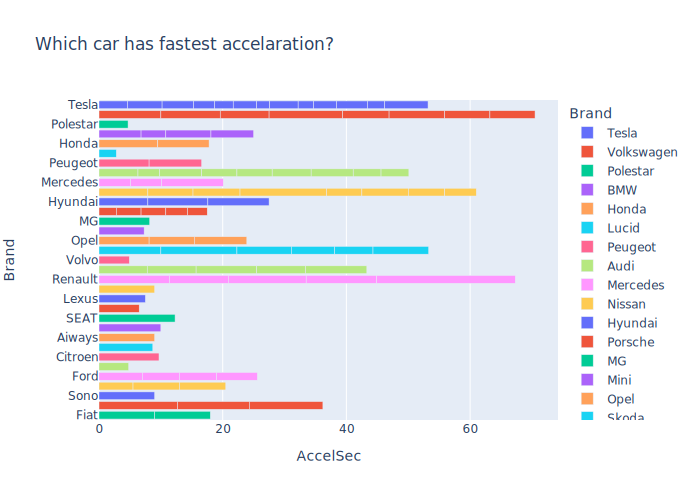

In [10]:

fig = px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)


<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

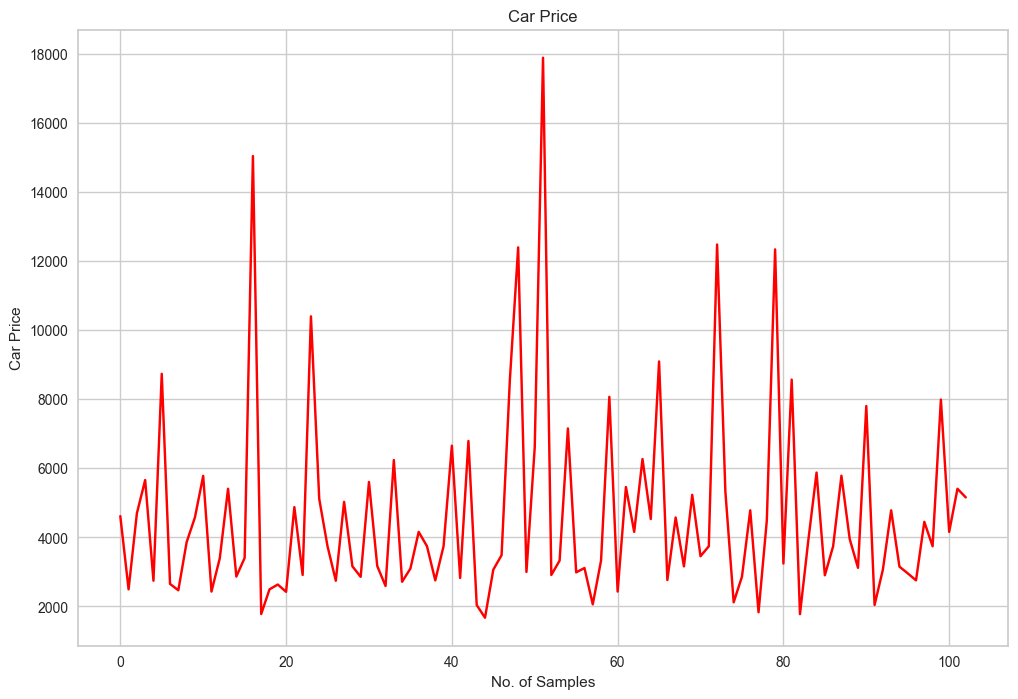

In [11]:
df['inr(10e3)'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')


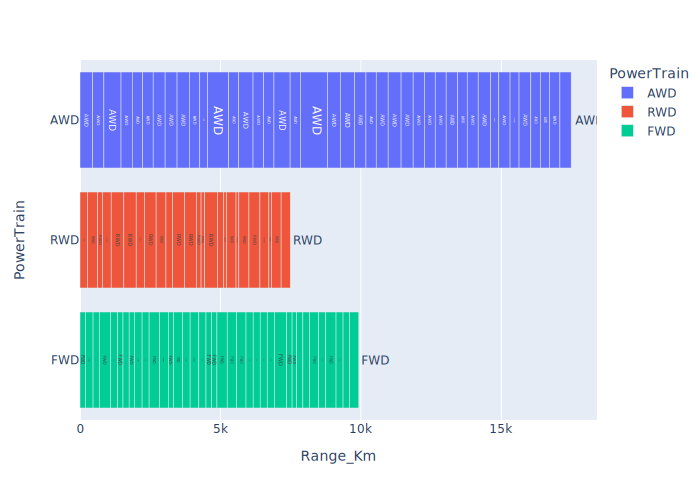

In [12]:

fig = px.bar(df,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')
pio.show(fig)


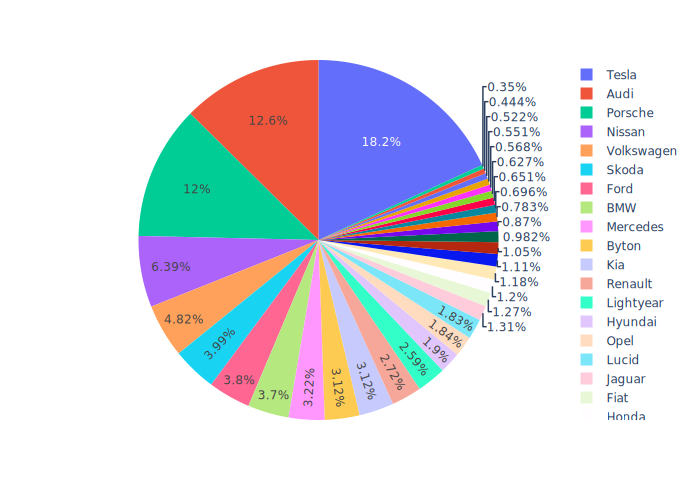

In [13]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)
     


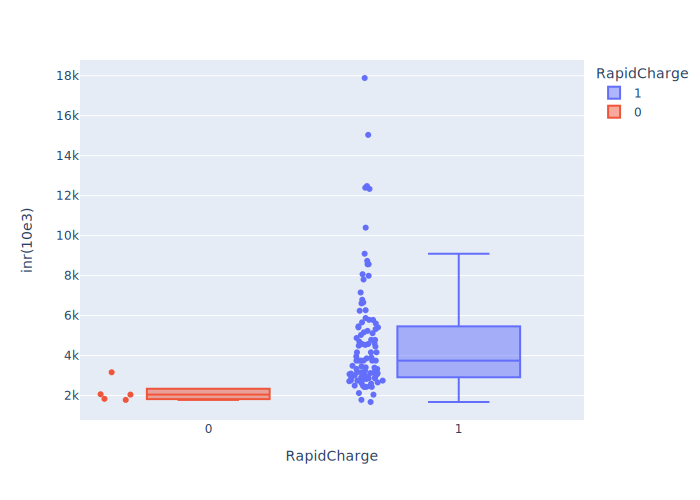

In [14]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
fig = px.scatter_3d(df,x = 'Brand',y = 'AccelSec',z = 'inr(10e3)',color = 'Brand')
fig = px.box(df,x='RapidCharge',y = 'inr(10e3)',color = 'RapidCharge',points='all')
pio.show(fig)


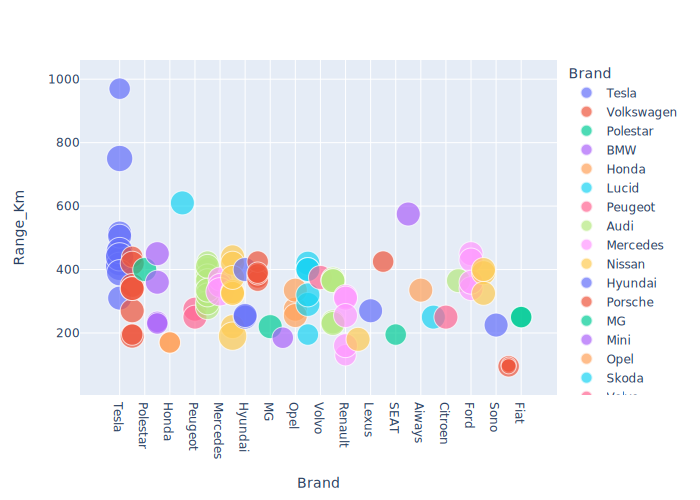

In [15]:

fig = px.scatter(df,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','inr(10e3)'])
pio.show(fig)


# PAIRPLOTTING ALL DATA  w.r.t. RAPID CHARGE

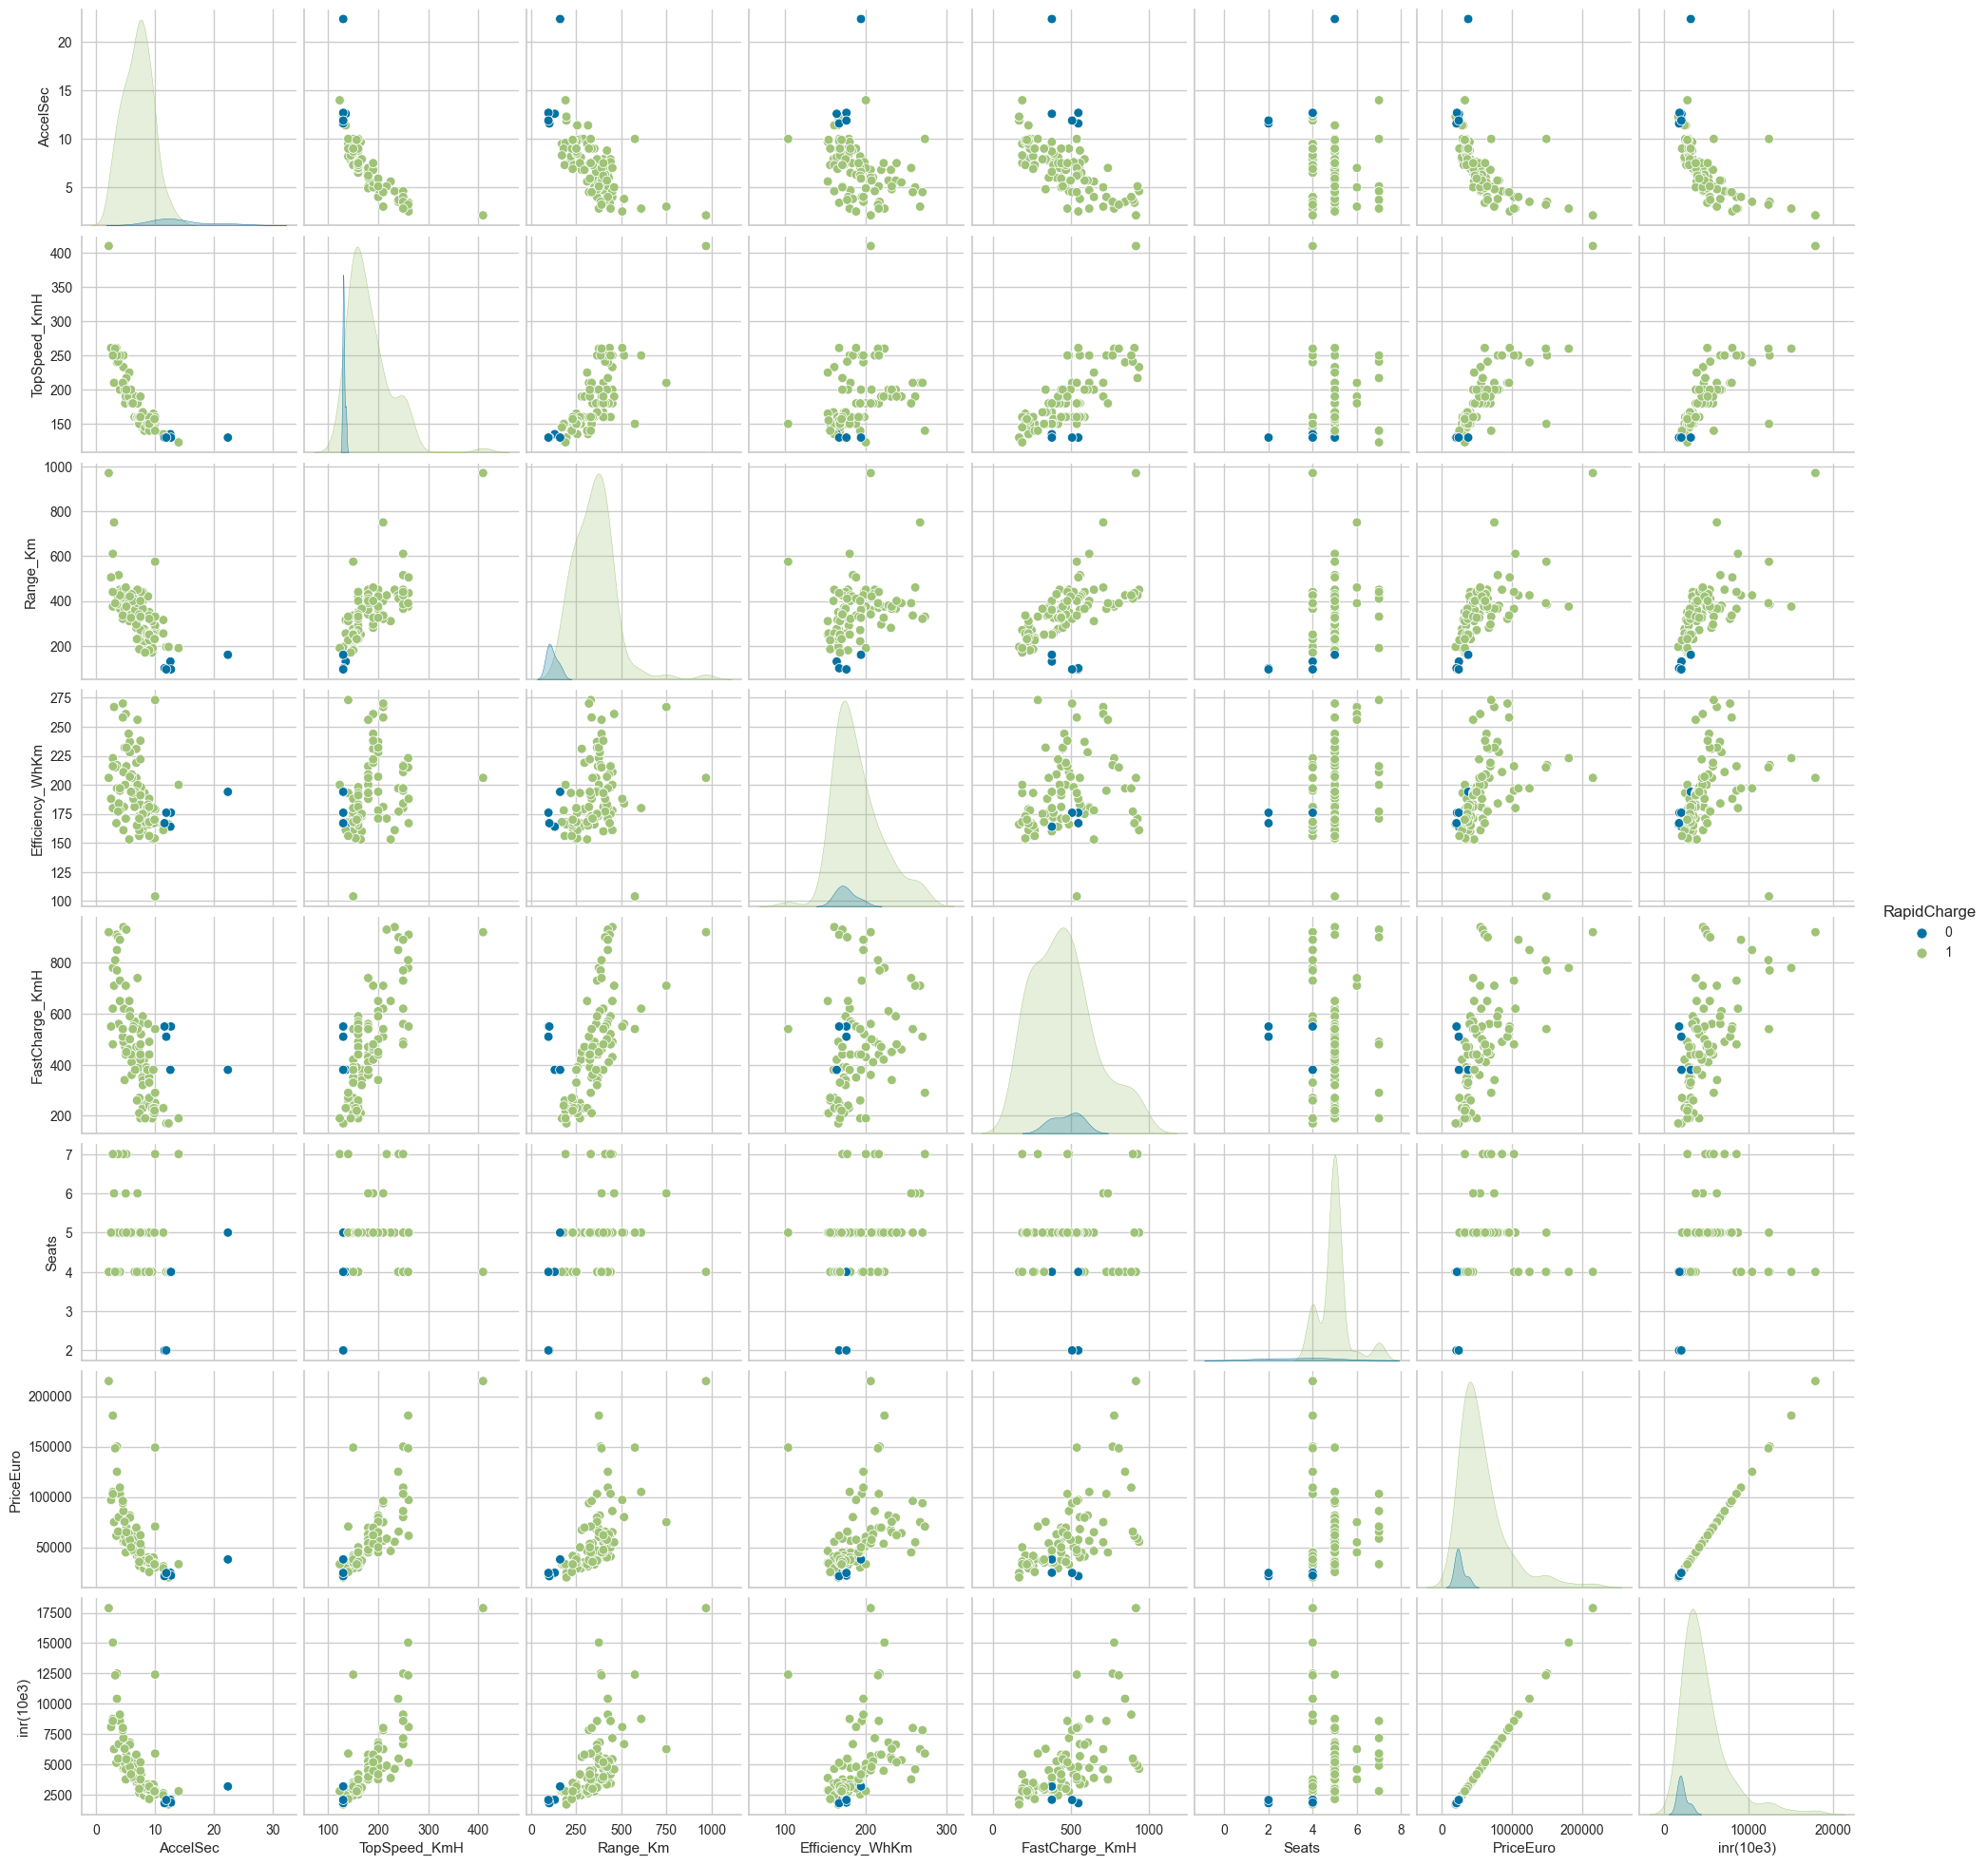

In [16]:
sb.pairplot(df,hue='RapidCharge')


In [17]:
#ax= plt.figure(figsize=(15,8))
#sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)
     

# MAKING COMPARISIONS OF OUR DATA

In [18]:

a=np.arange(1,104)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

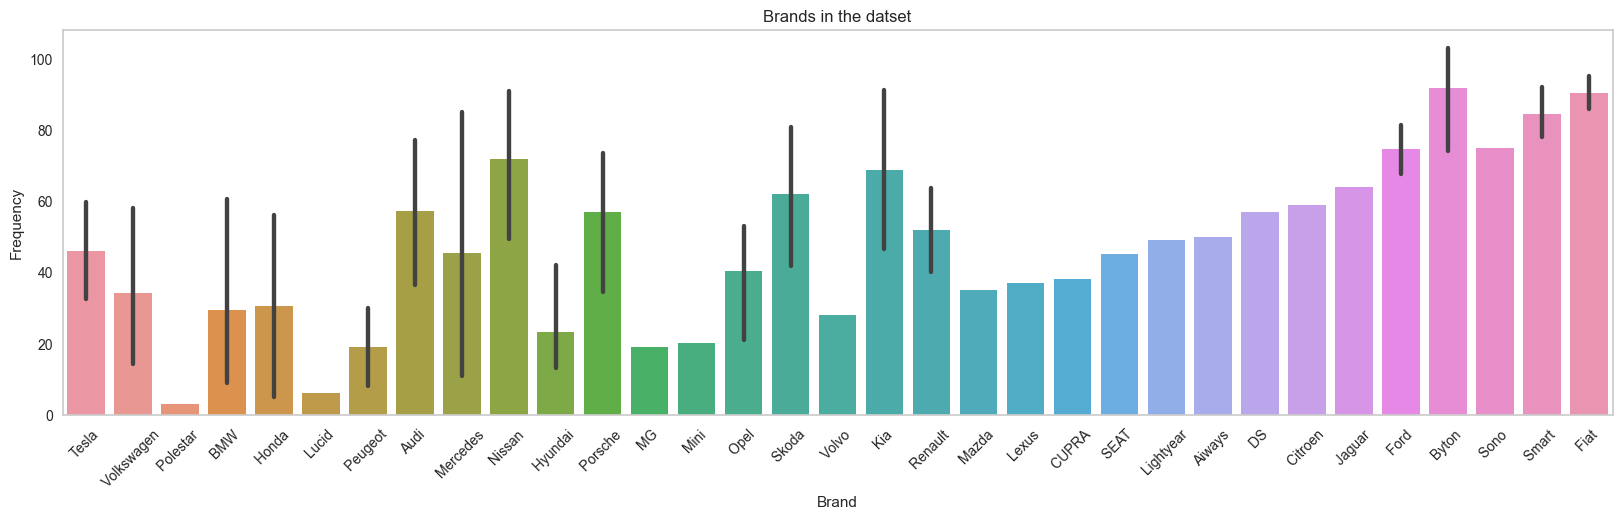

In [19]:

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
     


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

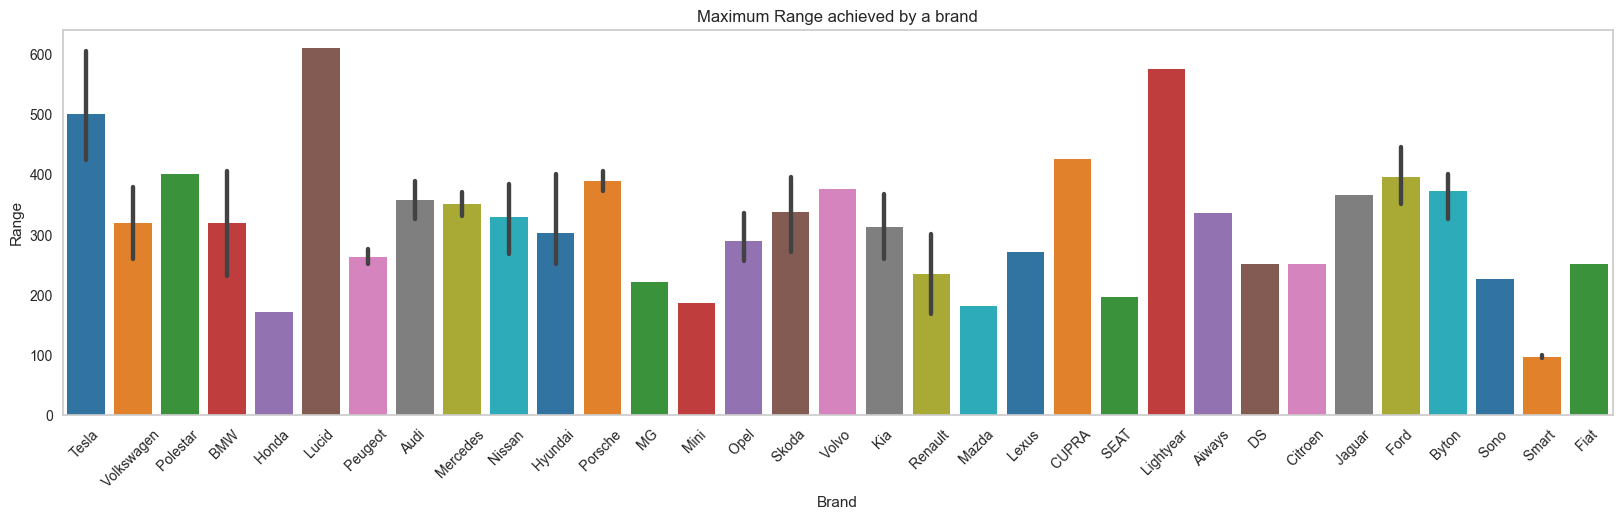

In [20]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)
     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

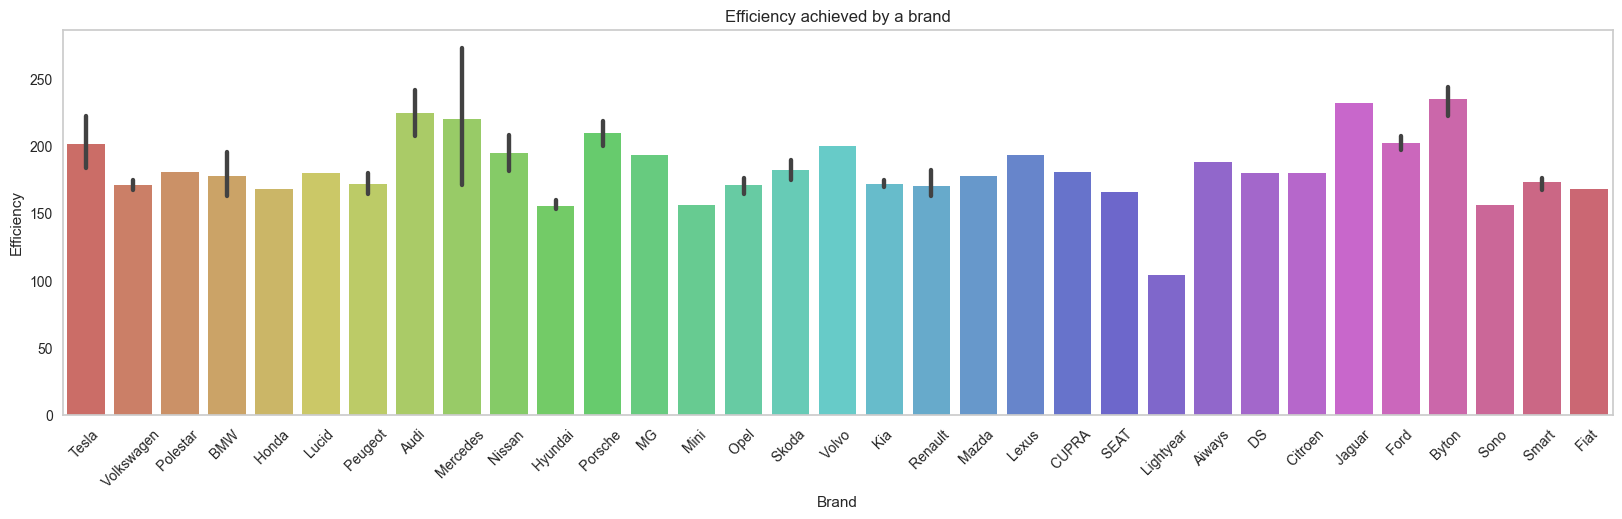

In [21]:

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

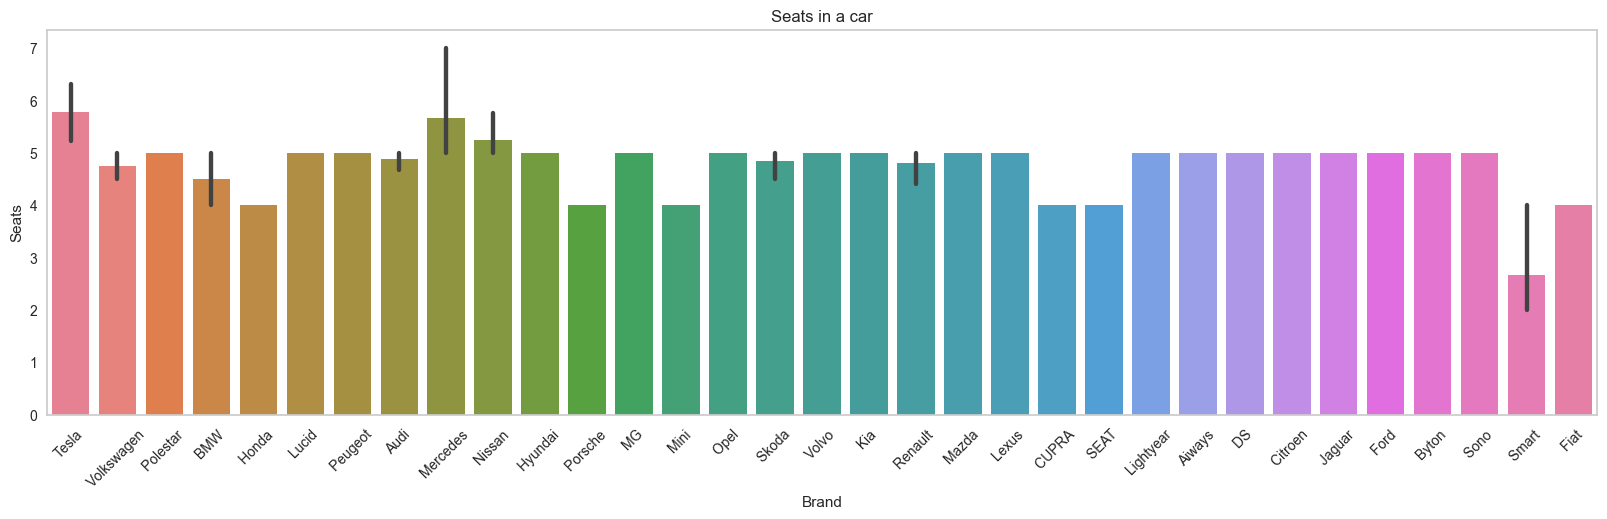

In [22]:

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

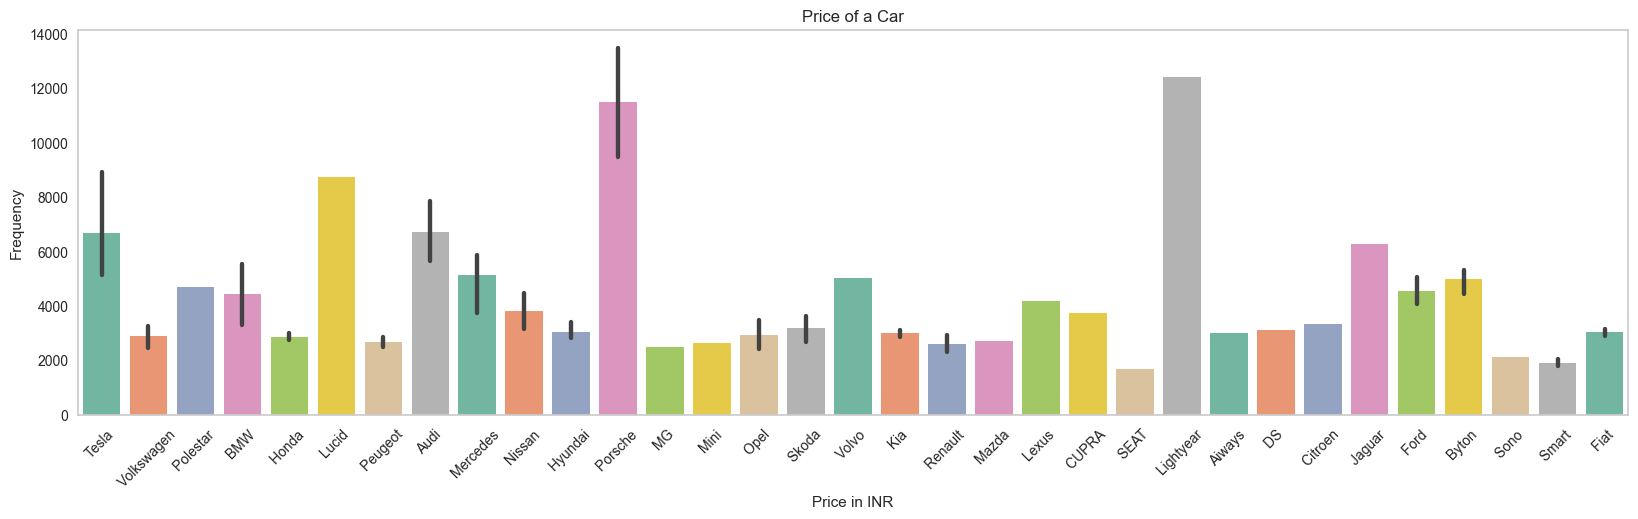

In [23]:

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='inr(10e3)',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
     


Text(0.5, 1.0, 'Plug Type')

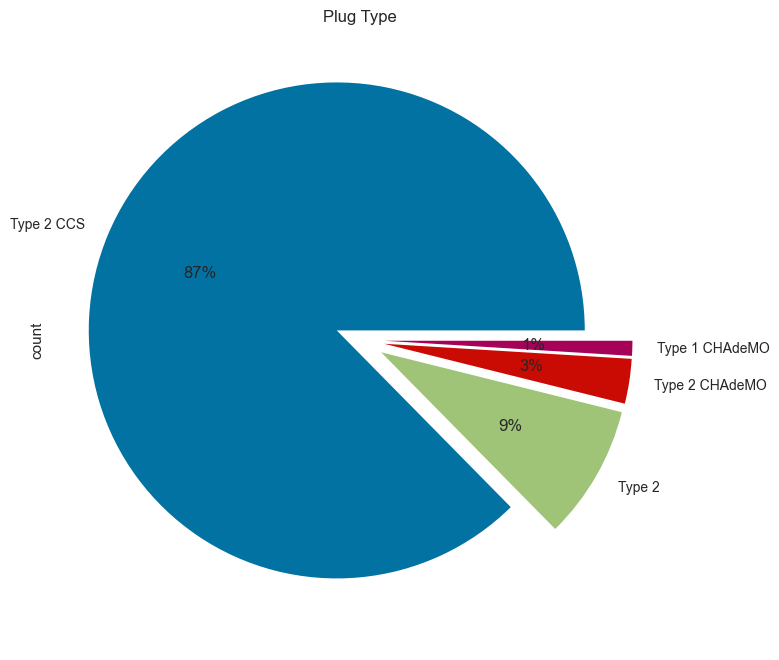

In [24]:

df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Text(0.5, 1.0, 'Body Style')

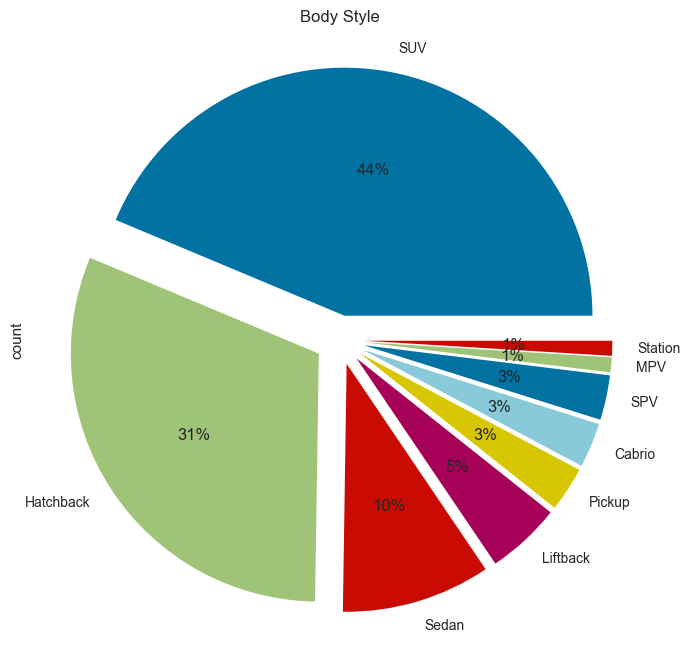

In [25]:

df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')


Text(0.5, 1.0, 'Segment')

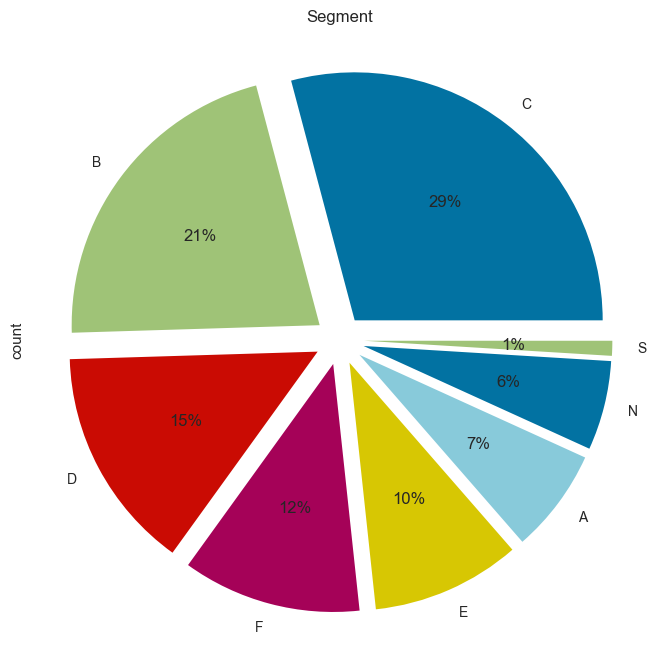

In [26]:

df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')


Text(0.5, 1.0, 'Seats')

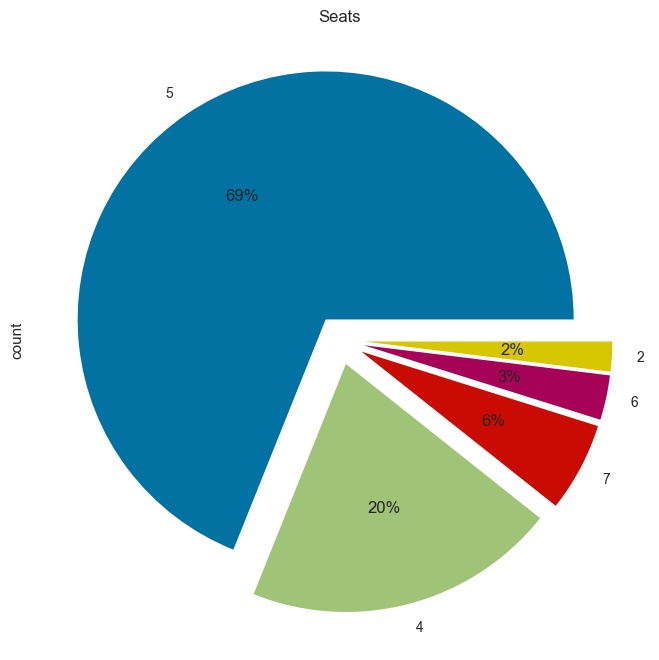

In [27]:

df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

In [28]:

df3= df[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2


In [29]:
df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)
     

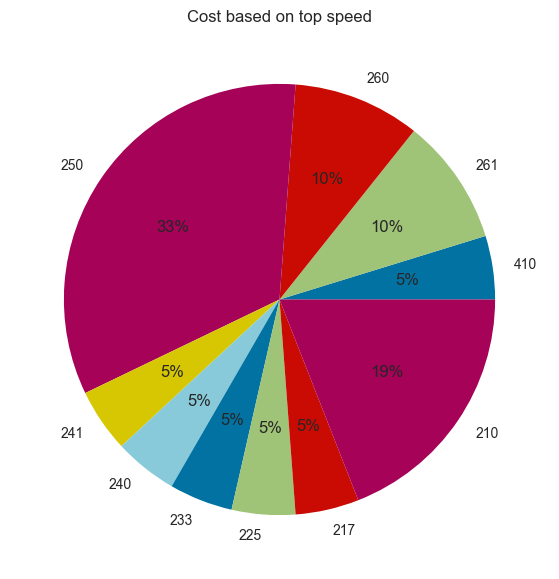

In [30]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["inr(10e3)"],labels=df3.index,autopct='%1.0f%%')
plt.show()
     

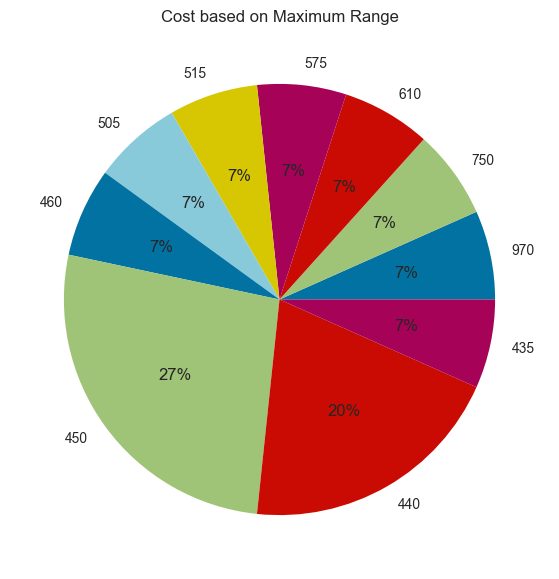

In [31]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["inr(10e3)"],labels=df4.index,autopct='%1.0f%%')
plt.show()


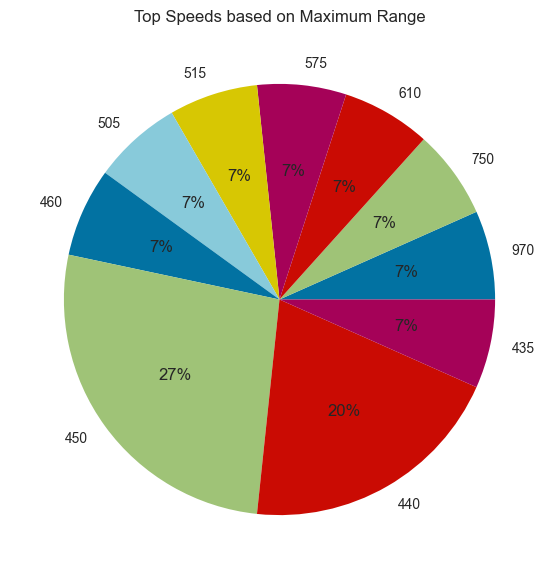

In [32]:

plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

# REGRESSION

# Putting independent variables as x and dependent variable as y

In [33]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']


# Finding out the linear regression using OLS method


In [34]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

# Fitting the model and summarizing


In [35]:
model=results.fit()
model.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.34
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.60e-24
Time:                        19:38:04   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2343.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.576e+04   3.04e+04     -3.148      0.002   -1.56e+05   -3.54e+04
AccelSec         1538.7358   1189.961      1.293      0.199    -823.317    3900.789
Range_Km           38.6413     23.362      1.654      0.101      -7.732      85.015
TopSpeed_KmH      570.8864     86.671      6.587      0.000     398.845     742.927
Efficiency_WhKm   112.0050     70.227      1.595      0.114     -27.395     251.405
RapidCharge     -2827.5602   1.09e+04     -0.259      0.796   -2.45e+04    1.88e+04
PowerTrain       5458.2534   2954.494      1.847      0.068    -406.371    1.13e+04
==============================================================================
Omnibus:                       84.153   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.603
Skew:                           2.620   Prob(JB):                    7.44e-158
Kurtosis:                      14.881   Cond. No.                     7.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
     


# Finding out the R-squared value

In [37]:

r2=(r2_score(y_test,pred))
print(r2*100)


78.56505811253687


In [38]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]
     


In [39]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)


In [40]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [41]:
cm = confusion_matrix(y1_test, pred1)
cm


array([[ 0,  1],
       [ 0, 20]], dtype=int64)

# Clustering

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

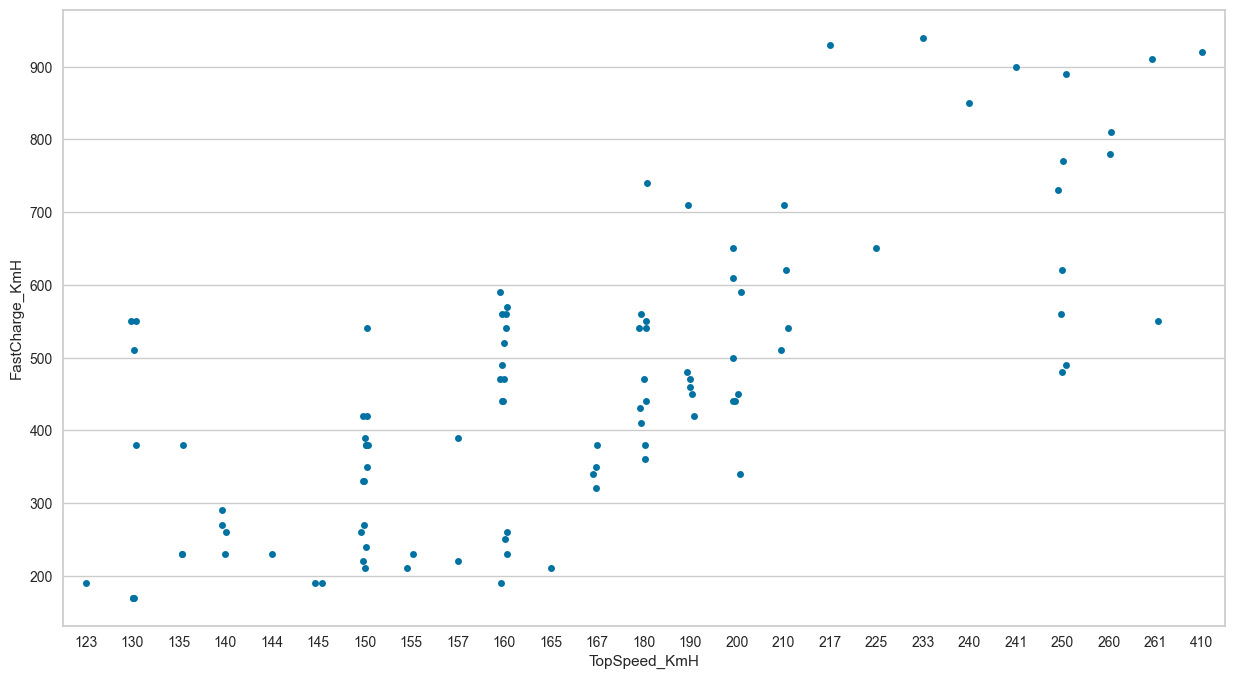

In [42]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)


In [ ]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)


<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

In [ ]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)


In [ ]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2


In [ ]:
df_9=data2.iloc[:,:9]
df_9.head(3)


In [ ]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df
     


In [ ]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sb.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [ ]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()


In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [ ]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.


In [ ]:
#To see each cluster size

Counter(kmeans.labels_)


In [ ]:
sb.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()


# Regression for data2

In [ ]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['inr(10e3)']
     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)
     


In [ ]:
print(lm.intercept_)
     


In [ ]:
lm.coef_


In [ ]:
X_train.columns


In [ ]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf


In [ ]:
predictions=lm.predict(X_test)
predictions


In [ ]:
y_test


In [ ]:
plt.scatter(y_test, predictions)


In [ ]:
sb.distplot((y_test-predictions))


In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


In [ ]:
metrics.mean_absolute_error(y_test,predictions)


In [ ]:
metrics.mean_squared_error(y_test,predictions)


In [ ]:

np.sqrt(metrics.mean_squared_error(y_test,predictions))
     
